<div class="alert alert-block alert-info">
<span style="font-family:Georgia; font-size:2.0em;"> PROGRAMA DE VERÃO FGV EMAp 2019</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> INTRODUCTION TO MACHINE LEARNING WITH PYTHON</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> Luis Gustavo Nonato </span> <br>
<span style="font-family:Georgia; font-size:1.0em;">ICMC-USP, Brazil </span>
</div>

# Regression
## This Lab Class requires the file <font color=blue> ESC2013_RMSP_CEM.csv </font> 

In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
columns = ['TIP_DEP','BIBLIO','QD_ESP_C','QD_ESP_D',
           'AP5EF_07','AP9EF_07','AP5EF_08','AP9EF_08',
          'AP5EF_09','AP9EF_09','AP5EF_10','AP9EF_10',
          'AP5EF_11','AP9EF_11','AP5EF_12','AP9EF_12',
          'AP5EF_13','AP9EF_13',
          'MAT05_AF','LP05_AF','MAT07_AF','LP07_AF','MAT09_AF','LP09_AF',
          'MAT11_AF','LP11_AF','MAT13_AF','LP13_AF',
          'IDEB13AF']
###########
# reading data_frame
###########
df = pd.read_csv('ESC2013_RMSP_CEM.csv',usecols=columns)
df[0:10]

,TIP_DEP,QD_ESP_C,QD_ESP_D,BIBLIO,AP5EF_07,AP9EF_07,AP5EF_08,AP9EF_08,AP5EF_09,AP9EF_09,...,LP05_AF,MAT07_AF,LP07_AF,MAT09_AF,LP09_AF,MAT11_AF,LP11_AF,MAT13_AF,LP13_AF,IDEB13AF
0,Estadual,0,1,0,93.6,NaN,97.5,NaN,94.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Municipal,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Municipal,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Estadual,0,1,0,NaN,76.6,NaN,80.7,NaN,92.1,...,NaN,230.40,220.14,229.93,229.88,242.32,248.41,247.08,238.32,4.4
4,Estadual,1,0,0,82.1,89.4,86.5,97.7,85.7,96.9,...,NaN,241.29,226.74,172.40,170.80,249.23,244.94,244.75,231.59,4.4
5,Estadual,1,0,0,100.0,NaN,100.0,NaN,92.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Estadual,0,0,1,91.3,89.1,90.0,82.8,86.5,89.5,...,NaN,221.65,225.47,NaN,NaN,246.69,246.32,256.65,246.62,4.6
7,Municipal,0,0,0,80.5,NaN,81.7,NaN,76.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Estadual,1,1,0,NaN,60.4,NaN,60.8,NaN,74.0,...,NaN,243.11,231.78,246.61,241.99,242.14,236.80,246.64,239.25,4.4
9,Municipal,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
###########
# extracting only municipal and estadual schools
###########
df = df.loc[(df['TIP_DEP']=='Municipal') | (df['TIP_DEP']=='Estadual')]
print(df.shape)

###########
# cleaning the data 
###########
# Removing schools with no score in IDEB13AF
df.dropna(subset=['IDEB13AF'],inplace=True)
print(df.shape)

# handling missing data
df[columns[4:]]=df[columns[4:]].fillna(df[columns[4:]].mean()) ##preenche a coluna com as médias da coluna
df[columns[1:]]=df[columns[1:]].fillna(0.0)


(5708, 29)
(2120, 29)


In [10]:
#############
# Setting the training data
#############
chosen_columns = columns[1:-1]  ##retira a primeira coluna e a útima coluna

X_data = df[chosen_columns].values ##seleciona os valores das colunas escolhidas
Y_data = df[columns[-1]].values ##seleciona os dados do IDEB 2013, que quer predizer

#############
# Making the regression
#############

linear_regr = linear_model.LinearRegression() ##instancia os objetos
ridge_regr = linear_model.Ridge(alpha=5.0)
lasso_regr = linear_model.Lasso(alpha=0.5)
linear_regr.fit(X_data, Y_data) ##encaixa nos dados 
ridge_regr.fit(X_data, Y_data)
lasso_regr.fit(X_data, Y_data)

print("Betas Linear:",linear_regr.coef_,linear_regr.intercept_)
print("Betas Ridge:",ridge_regr.coef_,ridge_regr.intercept_)
print("Betas Lasso:",lasso_regr.coef_,lasso_regr.intercept_)

#############
# Computing the Error
#############

print("MSE Linear: %.5f" % np.mean(np.subtract(linear_regr.predict(X_data), Y_data) ** 2))
print("MSE Ridge: %.5f" % np.mean(np.subtract(ridge_regr.predict(X_data), Y_data) ** 2))
print("MSE Lasso: %.5f" % np.mean(np.subtract(lasso_regr.predict(X_data), Y_data) ** 2))

Betas Linear: [ 1.38292914e-03  8.91326242e-03  1.99975158e-03 -9.19617575e-04
  4.41869946e-04  6.04061347e-04 -3.69202248e-04 -7.99310342e-04
 -7.49316977e-04 -3.42448630e-04 -3.15824165e-05  1.28141385e-02
  1.23432734e-02  9.66278947e-04  7.90624064e-04  1.97070795e-03
  2.00930660e-02 -1.62599205e-03  2.27011917e-03 -1.40181117e-04
  1.09568284e-03 -4.46443912e-04  5.53789649e-04 -3.34299702e-04
  1.15972627e-04  1.50053708e-02  1.58072881e-02] -7.743405045437675
Betas Ridge: [ 1.34877050e-03  8.74306860e-03  1.92826878e-03 -9.19046028e-04
  4.41720513e-04  6.02634452e-04 -3.69037108e-04 -7.99877021e-04
 -7.49373466e-04 -3.43111870e-04 -3.16228391e-05  1.28076093e-02
  1.23434243e-02  9.67788360e-04  7.90786251e-04  1.96963894e-03
  2.00923981e-02 -1.62538712e-03  2.26912619e-03 -1.39629091e-04
  1.09590875e-03 -4.46124575e-04  5.53520418e-04 -3.33890596e-04
  1.15923972e-04  1.50053264e-02  1.58069402e-02] -7.742521112678589
Betas Lasso: [-0.          0.          0.          0.  

### Regularization parameter is important 

(2120,)
Ridge min: (red) 0.015608734729652237
Lasso min: (green) 0.015683925918354494


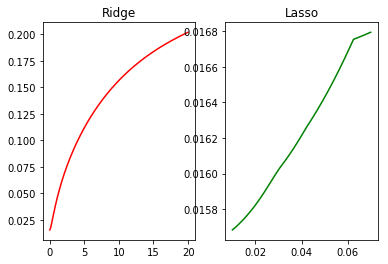

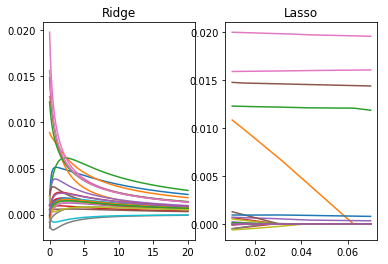

In [13]:
n_alphas = 1000                   # number of regularization coefficients
a_ridge =  np.linspace(0.01,20,n_alphas)  # 50 values between 0.01 and 1
erl_ridge = []                      # list of errors for ridge regression
coefs_ridge = []                    # list of coefficients 

##regressão ridge

for i in a_ridge:
    ridge_regr = linear_model.Ridge(alpha=i,normalize=True)
    #ridge_regr = linear_model.Ridge(alpha=i)
    ridge_regr.fit(X_data, Y_data)
    erl_ridge.append(np.mean(np.subtract(ridge_regr.predict(X_data), Y_data) ** 2)) # MSE ridge
    coefs_ridge.append(ridge_regr.coef_)
    
a_lasso =  np.linspace(0.01,0.07,n_alphas)  # 50 values between 0.01 and 10
erl_lasso = []                      # list of errors for lasso regression
coefs_lasso = []
print(Y_data.shape)

##regressão lasso

for i in a_lasso:
    #lasso_regr = linear_model.Lasso(alpha=i,normalize=True)
    lasso_regr = linear_model.Lasso(alpha=i)
    lasso_regr.fit(X_data, Y_data)
    erl_lasso.append(np.mean(np.subtract(lasso_regr.predict(X_data).reshape(-1,1), Y_data.reshape(-1,1)) ** 2)) # MSE lasso
    coefs_lasso.append(lasso_regr.coef_)

plt.figure(1)
plt.subplot(121)

##valores do erro para cada s
plt.title('Ridge')
plt.plot(a_ridge,erl_ridge,color='red')
plt.subplot(122)
plt.title('Lasso')
plt.plot(a_lasso,erl_lasso,color='green')

plt.figure(2)
plt.subplot(121)
plt.title('Ridge')
matridge_coefs = np.asarray(coefs_ridge).reshape(n_alphas,len(chosen_columns))
for i in range(matridge_coefs.shape[1]):
    plt.plot(a_ridge,matridge_coefs[:,i],label=chosen_columns[i])
#plt.legend()    

plt.subplot(122)
plt.title('Lasso')
matlasso_coefs = np.asarray(coefs_lasso).reshape(n_alphas,len(chosen_columns))
for i in range(matlasso_coefs.shape[1]):
    plt.plot(a_lasso,matlasso_coefs[:,i],label=chosen_columns[i])
#plt.legend(loc=2) 

print("Ridge min: (red)", min(erl_ridge))
print("Lasso min: (green)", min(erl_lasso))

### Using cross validation

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# --------------------
# K-fold CV
# --------------------
## sem repetição, escolhe apenas um grupo
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size=0.7, test_size = 0.3, random_state=3) ## 3 força a inicialização
ts = Y_test.shape[0] ##quantos ficaram para teste

linear_regr = linear_model.LinearRegression() 
linear_regr.fit(X_train, Y_train) ##faz os ajustes nos dados para treinamento

# Predicting
Y_pred = linear_regr.predict(X_test)

# Prediction error
print("MSE Linear: %.5f" % np.mean(np.subtract(Y_pred, Y_test) ** 2))

MSE Linear: 0.01565


(63, 636)
(636,)
O menor MSE Linear é 0.01156254233415358 do índice 274


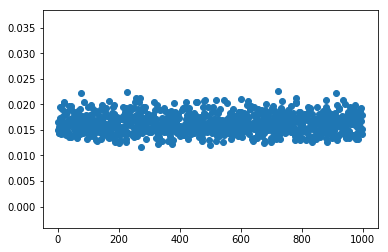

In [55]:
limit = 1000
epsilon = 0.002
error = []
X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_data,train_size = 0.7,test_size = 0.3,random_state=3)
Y = np.zeros((limit,len(X_test)))
for i in range(limit):
    train = np.random.randint(3,10000)  ## calculda o seed do random parar o train_split
    X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_data,train_size = 0.7,test_size = 0.3,random_state=train)
    linear_regr = linear_model.LinearRegression() ##instancia a regressão linear
    linear_regr.fit(X_train, Y_train) ##encaixa os dados nela
    
    Y_pred = linear_regr.predict(X_test) ##prediz, conforme os dados
    Y[i,:] = Y_pred ##adiciona a uma matriz de predições
    error.append(np.mean(np.subtract(Y_pred, Y_test) ** 2)) ##adiciona o erro a uma lista
    if i == 0: 
        less_error = error[0]
        indice = 0
    elif error[-1] < less_error:
        less_error = error[-1]
        indice = len(error)-1
        
indices = []

for i in range(limit):
    if error[i] > less_error + epsilon:
        indices.append(i)
indices = np.array(indices)
Y = np.delete(Y,indices,0)
    
print(Y.shape)

Y_pred = np.mean(Y,axis = 0)

print(Y_pred.shape)

plt.scatter(range(limit),error)
print('O menor MSE Linear é {} do índice {}'.format(less_error,indice))